## Question 1

In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from utils import styled_print, plot_scatter_plot

### Part B -  Clustering With Python

#### Part 1 - Use non hierarchical k-means (k=3) and show clusters’ memberships of the above dataset. 

In [3]:
# Initialize the dataset
data = np.array(
    [[8, 4], [5, 4], [2, 4], [2, 6], [2, 8], [8, 6]]
)

# Dataframe of the dataset
data_df = pd.DataFrame.from_dict({
    "RID": [1, 2, 3, 4, 5, 6],
    "Dimension 1": [8, 5, 2, 2, 2, 8],
    "Dimension 2": [4, 4, 4, 6, 8, 6]
})

# Setting RID as Index Column
# data_df = data_df.set_index('RID')

data_df.head(10)

,RID,Dimension 1,Dimension 2
0,1,8,4
1,2,5,4
2,3,2,4
3,4,2,6
4,5,2,8
5,6,8,6


In [4]:
# Function to create Cluster Map for Better Visualization and Filtering
def create_cluster_map(data, model):
    cluster_map = pd.DataFrame()
    cluster_map['ClusterID'] = model.labels_
    cluster_map = pd.concat([data, cluster_map], axis=1)
    return cluster_map

def get_centroid(data, kmeans):
    centroids = pd.DataFrame(kmeans.cluster_centers_, columns=data.columns)
    return centroids

In [5]:
kmeans = KMeans(n_clusters=3, random_state=0, init='random', n_init='auto').fit(data_df.drop('RID', axis=1))
cluster_map = create_cluster_map(data_df, kmeans)

styled_print(f"Cluster Map from Kmeans with Random Cluster Initialization", header=True)
print(cluster_map.head(10))

styled_print(f"Cluster Centroid from Kmeans with Random Cluster Initialization", header=True)
print(get_centroid(data_df.drop('RID', axis=1), kmeans).head(10))

› Cluster Map from Kmeans with Random Cluster Initialization
   RID  Dimension 1  Dimension 2  ClusterID
0    1            8            4          0
1    2            5            4          1
2    3            2            4          1
3    4            2            6          2
4    5            2            8          2
5    6            8            6          0
› Cluster Centroid from Kmeans with Random Cluster Initialization
   Dimension 1  Dimension 2
0          8.0          5.0
1          3.5          4.0
2          2.0          7.0


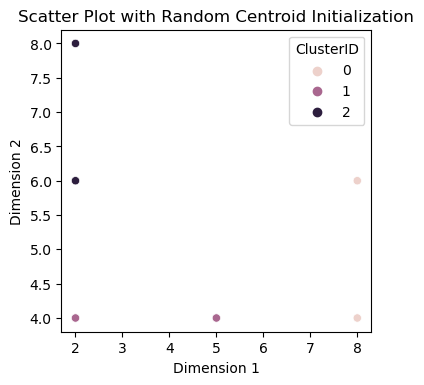

In [6]:
plot_scatter_plot(
    df=cluster_map, 
    x="Dimension 1", 
    y="Dimension 2", 
    hue='ClusterID',
    title="Scatter Plot with Random Centroid Initialization", 
    figsize=(4, 4), 
    dpi=100)

**As we can see from the above table that it is not matching the table we got from the manual clustering in Part A.** The reason is that in Part A we selected RID 1, 3 and 5 as initial centroid while here we are selecting random samples as initial centroid. Let's try selecting RID 1, 3 and 5 as initial centroids to verify our manual clustering in Part A. 

In [7]:
init_centroids = [[8, 4], [2, 4], [2, 8]]
kmeans = KMeans(n_clusters=3, random_state=0, init=init_centroids, n_init=1).fit(data_df.drop('RID', axis=1))
cluster_map = create_cluster_map(data_df, kmeans)

styled_print(f"Cluster Map from Kmeans with Proposed Centroid Initialization", header=True)
print(cluster_map.head(10))

styled_print(f"Cluster Centroid from Kmeans with Proposed Centroid Initialization", header=True)
print(get_centroid(data_df.drop('RID', axis=1), kmeans).head(10))

› Cluster Map from Kmeans with Proposed Centroid Initialization
   RID  Dimension 1  Dimension 2  ClusterID
0    1            8            4          0
1    2            5            4          0
2    3            2            4          1
3    4            2            6          1
4    5            2            8          2
5    6            8            6          0
› Cluster Centroid from Kmeans with Proposed Centroid Initialization
   Dimension 1  Dimension 2
0          7.0     4.666667
1          2.0     5.000000
2          2.0     8.000000


Again here the results are almost same apart from one case. In our manual clustering sample with RID 4 was part of the same cluster as RID 5 i.e. Cluster ID 2. Here RID 3 and RID 4 are part of same cluster with Cluster ID 1. If you remember the shortest distance of sample with RID 4 was same for Cluster ID 1 and Cluster ID 2. In the manual calculation we randomly selected Cluster ID 2 and that is why sample with RID 4 landed in the same cluster as the sample with RID 5. If we have selected Cluster ID 1 at that stage, we would have got the same result as mentioned in this table.

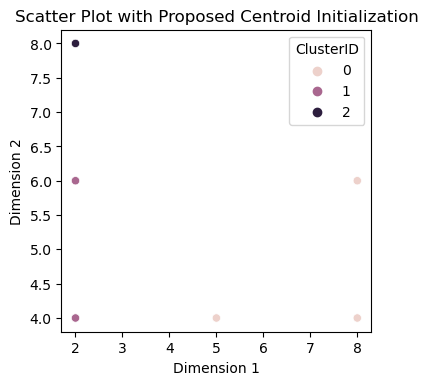

In [8]:
plot_scatter_plot(
    df=cluster_map, 
    x="Dimension 1", 
    y="Dimension 2", 
    hue='ClusterID',
    title="Scatter Plot with Proposed Centroid Initialization", 
    figsize=(4, 4), 
    dpi=100)

#### Part 2 - Use Hierarchical Clustering - Agglomerative Clustering.

In [9]:
agglomerative = AgglomerativeClustering(n_clusters=None, distance_threshold=0, metric='euclidean', linkage = 'complete').fit(data_df.drop('RID', axis=1))

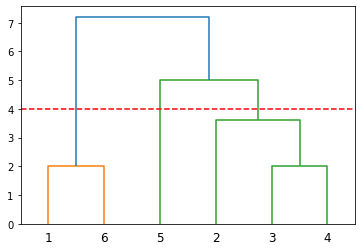

In [10]:
# Source of the function is https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwargs)

plot_dendrogram(agglomerative, truncate_mode="level", p=5, labels=[1, 2, 3, 4, 5, 6])
plt.axhline(y = 4, color = 'r', linestyle = '--')

As we can see that heirarchical clustering creates 6 clusters at the beginning and gradually converges to 1 cluster. Based on different threshold we can have different number of clusters. For example if we choose distance threshold to be 4 (indicated with red line), we have total 3 clusters where data samples with RID 1 and 6 are part of one cluster. Data samples with RID 2, 3, and 4 are part of second cluster. The data sample with RID 5 is part of third cluster. 

#### Clustering on Restaurants Table from Assignment 1 (For Bonus Marks)

In [11]:
csv_path = "../Assignment - 1 - Database Design/data/restaurants.csv"
df = pd.read_csv(csv_path)
df.head(5)

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700


First let's try to cluster restaurants based on `score` and `ratings` features. Let's remove the Null values.

In [12]:
data_df = df.dropna(axis=0, subset=["score", "ratings"])
data_df.head()

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700
6,7,27,Jinsei Sushi,4.7,63.0,"Sushi, Asian, Japanese",$,"1830 29th Ave S, Birmingham, AL, 35209",35209,33.480440,-86.790440
13,14,51,Panera (521 Fieldstown Road),4.6,44.0,"Breakfast and Brunch, salad, Sandwich, Family ...",$,"521 Fieldstown Road, Gardendale, AL, 35071",35071,33.651407,-86.819247
15,16,88,Jeni's Splendid Ice Cream (Pepper Place),5.0,20.0,"Ice Cream &amp; Frozen Yogurt, Comfort Food, D...",$$$,"219 29th St S, Birmingham, AL, 35233",35233,33.516600,-86.789950
18,19,30,Falafel Cafe,4.9,48.0,"Middle Eastern, Mediterranean, Vegetarian, Gre...",$,"401 19th St S, Birmingham, AL, 35233",35233,33.508353,-86.803170


In [13]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_df[["score", "ratings"]]), columns = data_df[["score", "ratings"]].columns)
data_scaled.head()

,score,ratings
0,0.466403,-0.730465
1,0.466403,-0.164009
2,0.130871,-0.426513
3,1.472997,-0.758097
4,1.137466,-0.371249


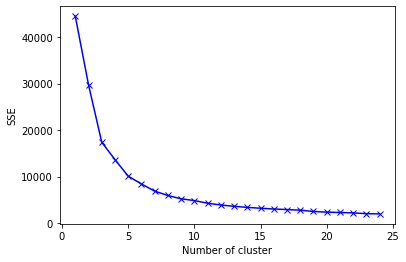

In [14]:
sse = {} 
for k in range(1, 25):
    kmeans = KMeans(n_init='auto', n_clusters=k, init='random', random_state=0).fit(data_scaled)
    sse[k] = kmeans.inertia_

# Elbow plot
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

From Elbow Plot we are getting k = 3. Let's verify same for Silhouette Score.

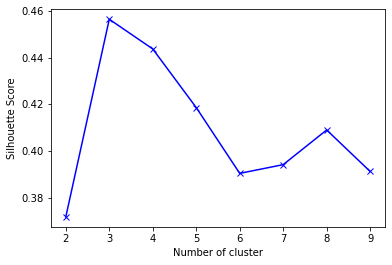

In [15]:
sc = {} 
for k in range(2, 10):
    kmeans = KMeans(n_init='auto', n_clusters=k, init='random', random_state=0).fit(data_scaled)
    labels = kmeans.predict(data_scaled)
    sc[k] = silhouette_score(data_scaled, labels)

# Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

As we can see that the Silhouette Score bumps up at k = 3. We will use k = 3 for our model development. 

In [16]:
kmeans = KMeans(n_init='auto', n_clusters = 3, random_state = 1).fit(data_scaled)

data_df['KMeans_Labels'] = kmeans.predict(data_scaled)
data_scaled['KMeans_Labels'] = kmeans.predict(data_scaled)

<ipython-input-16-99eca3b3d76b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['KMeans_Labels'] = kmeans.predict(data_scaled)


In [17]:
data_df.head(10)

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng,KMeans_Labels
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700,0
6,7,27,Jinsei Sushi,4.7,63.0,"Sushi, Asian, Japanese",$,"1830 29th Ave S, Birmingham, AL, 35209",35209,33.480440,-86.790440,0
13,14,51,Panera (521 Fieldstown Road),4.6,44.0,"Breakfast and Brunch, salad, Sandwich, Family ...",$,"521 Fieldstown Road, Gardendale, AL, 35071",35071,33.651407,-86.819247,0
15,16,88,Jeni's Splendid Ice Cream (Pepper Place),5.0,20.0,"Ice Cream &amp; Frozen Yogurt, Comfort Food, D...",$$$,"219 29th St S, Birmingham, AL, 35233",35233,33.516600,-86.789950,0
18,19,30,Falafel Cafe,4.9,48.0,"Middle Eastern, Mediterranean, Vegetarian, Gre...",$,"401 19th St S, Birmingham, AL, 35233",35233,33.508353,-86.803170,0
19,20,40,MrBeast Burger (838 Odum Road),3.7,19.0,"American, Burgers, Sandwich",$$,"838 Odum Road, Gardendale, AL, 35071",35071,33.645480,-86.826260,2
26,27,113,Ruscelli's Food Truck at Mojo Pub,4.7,100.0,"Italian, Exclusive to Eats",$,"2801 7th Ave S, Birmingham, AL, 35233",35233,33.511130,-86.788388,0
34,35,80,Starbucks (Hwy 11 and Avenue W),4.6,21.0,"Bakery, Breakfast and Brunch, Cafe, Coffee &am...",$,"2401 Crossplex Boulevard 101, Birmingham, AL, ...",35208,33.497944,-86.874391,0
35,36,77,"Moe's Southwest Grill (655 Fieldstown Road, Su...",4.8,24.0,"Mexican, Fast Food, Salads, Healthy",$,"655 Fieldstown Road, Gardendale, AL, 35071",35071,33.649758,-86.823942,0
36,37,66,La Tia Paisa Taco Shop,4.3,24.0,"Mexican, Breakfast and Brunch, Burritos",$$,"406 W Valley Ave, Homewood, AL, 35209",35209,33.470750,-86.826140,2


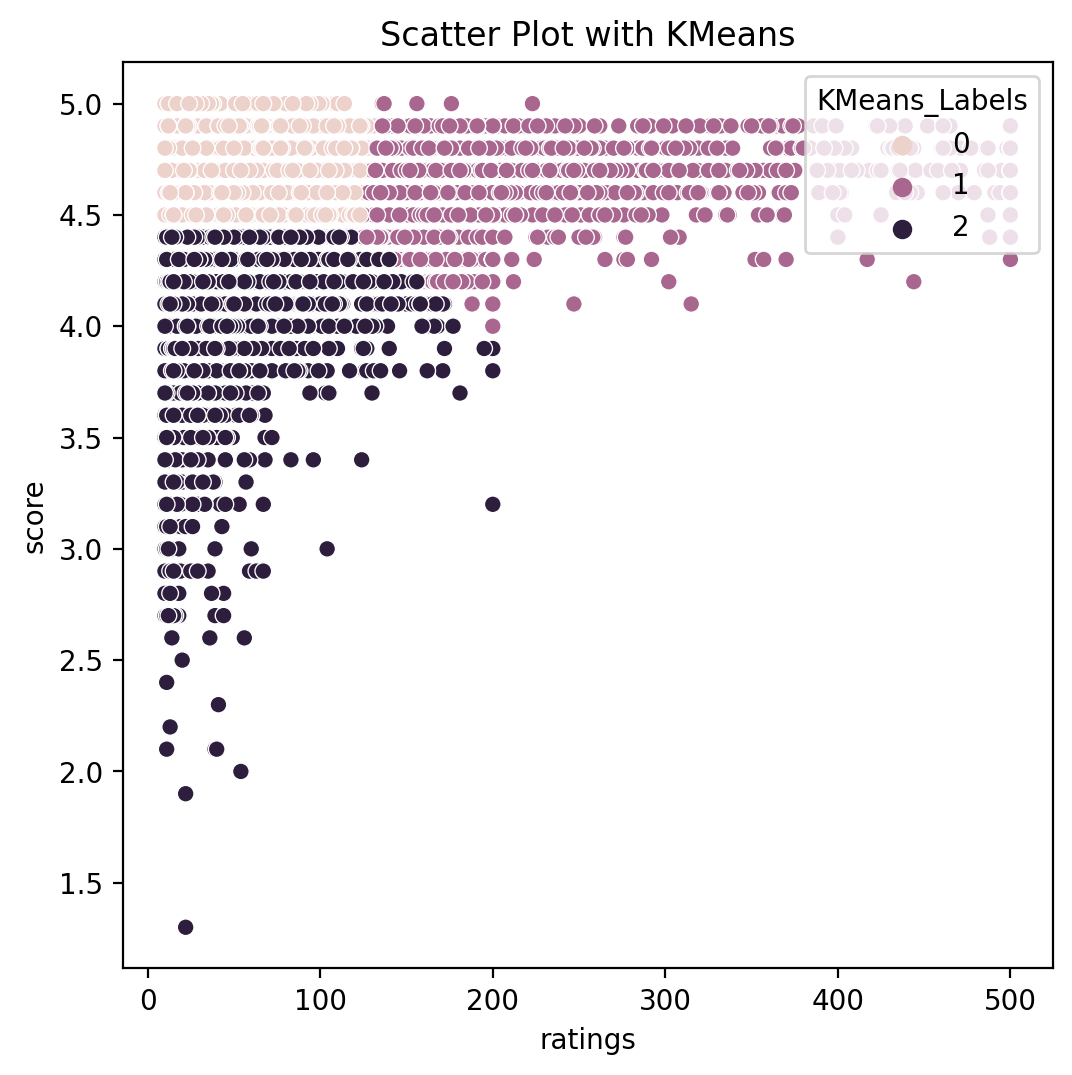

In [18]:
plot_scatter_plot(
    df=data_df, 
    x="ratings", 
    y="score", 
    hue='KMeans_Labels',
    title="Scatter Plot with KMeans", 
    figsize=(6, 6), 
    dpi=200)

As we can see the Kmeans is able to group reastaurant in three groups:
1. Restaurants with Higher Score and Higher Number of Ratings are part of Cluster 1.
2. Restaurant with Lower Score and Lower Number of Ratings are part of Cluster 2.
3. Restaurats with Higher Score but Lower Number of Ratings are part of Cluster 0. 

This is so interesting information because cluster 0 highlights the restaurants which might be new in area but serve really good food and people might be liking them a lot. It would be great for UberEats to recommend those restaurants to customers.  